Index(['danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'key', 'time_signature'],
      dtype='object')
danceability


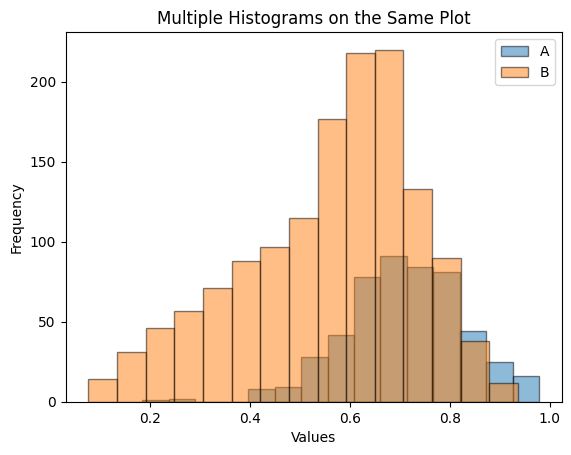

duration_ms


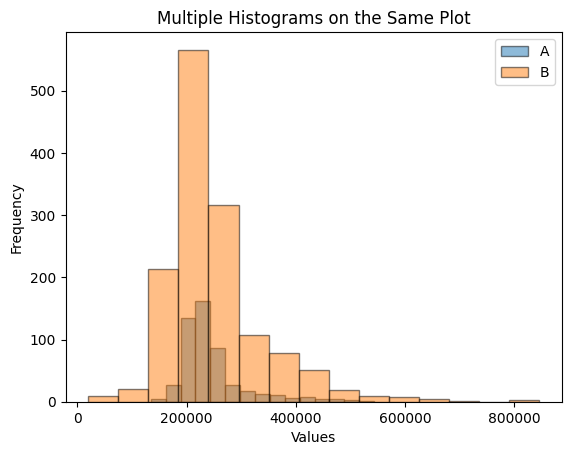

energy


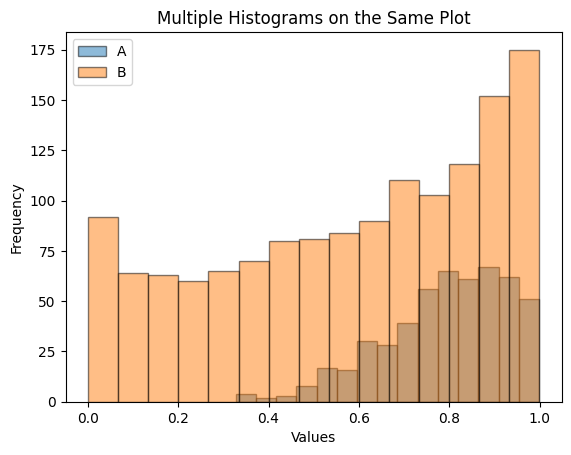

instrumentalness


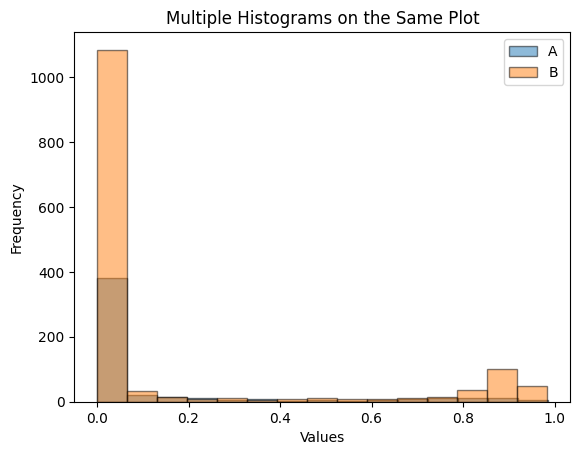

liveness


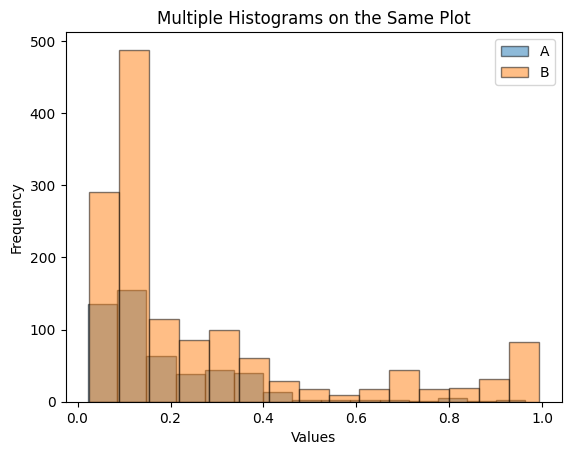

loudness


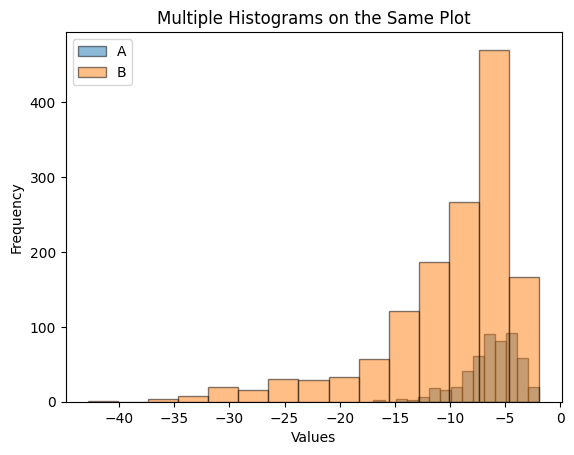

speechiness


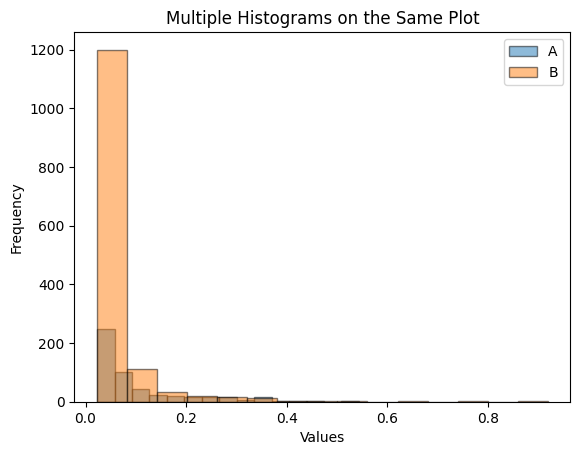

tempo


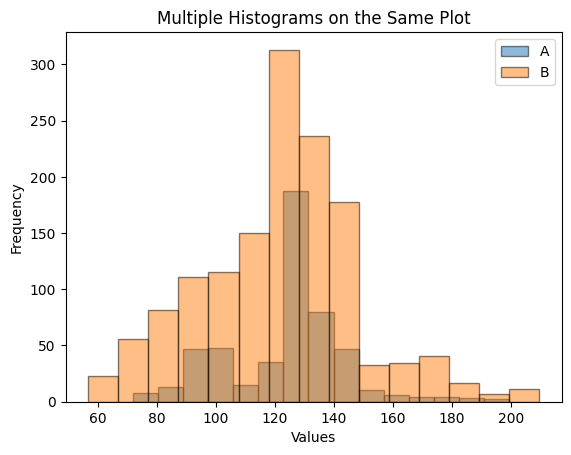

valence


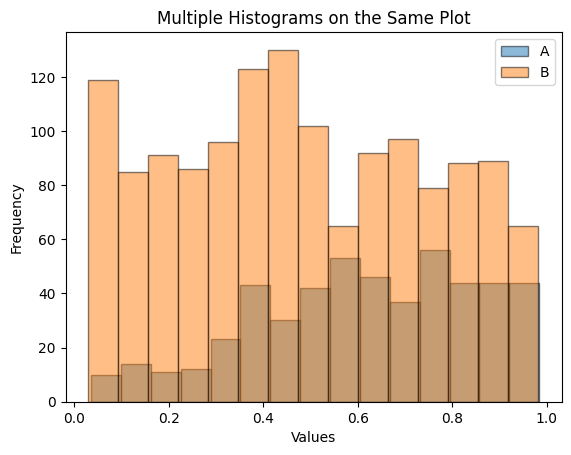

key


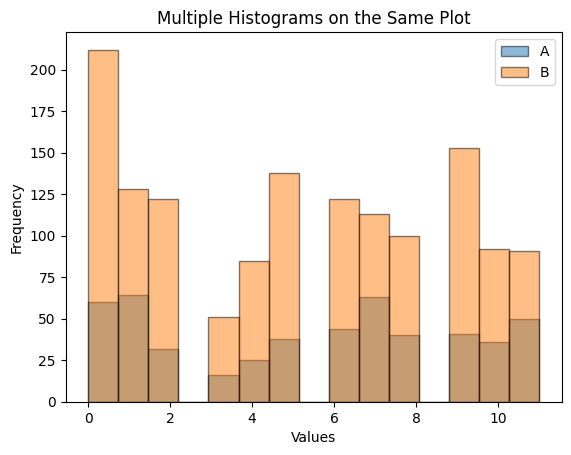

time_signature


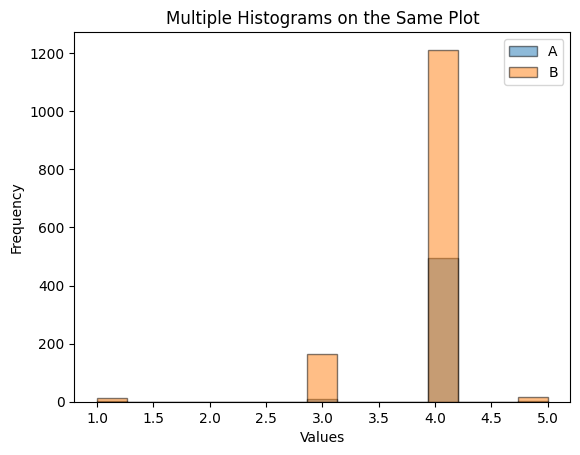

'\n    ax = bangers_df[feature].hist(bins=20, edgecolor=\'black\')  # Adjust the number of bins as needed\n    ax.set_title("bangers " + feature)\n    ax.set_xlabel(feature)\n    ax.set_ylabel(\'Frequency\')\n    plt.show()\n    bx = non_bangers_df[feature].hist(bins=20, edgecolor=\'black\')  # Adjust the number of bins as needed\n    bx.set_title("non_bangers " + feature)\n    bx.set_xlabel(feature)\n    bx.set_ylabel(\'Percentage\')\n    plt.show()\n    '

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

bangers_df = pd.read_csv("./audio_features.csv")
non_bangers_df = pd.read_csv("./NB_audio_featers.csv")

features_list = bangers_df.iloc[:, 2:13].columns
print(features_list)

for feature in features_list:
    #generate graph for each category
    #values = bangers_df[feature]
    #data = {feature: values}
    print(feature)
    #temp_df = df = pd.DataFrame(data)
    #temp_df['values'].plot.hist(bins=5, edgecolor='black')

    # Plot multiple histograms on the same plot
    plt.hist(bangers_df[feature], alpha=0.5, label='A', bins=15, edgecolor='black')
    # Fit a normal distribution to the data
    mu, std = norm.fit(bangers_df[feature])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.hist(non_bangers_df[feature], alpha=0.5, label='B', bins=15, edgecolor='black')

    # Set plot title and axis labels
    plt.title('Multiple Histograms on the Same Plot')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Display legend
    plt.legend()

    # Display the plot
    plt.show()



"""
    ax = bangers_df[feature].hist(bins=20, edgecolor='black')  # Adjust the number of bins as needed
    ax.set_title("bangers " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    plt.show()
    bx = non_bangers_df[feature].hist(bins=20, edgecolor='black')  # Adjust the number of bins as needed
    bx.set_title("non_bangers " + feature)
    bx.set_xlabel(feature)
    bx.set_ylabel('Percentage')
    plt.show()
    """


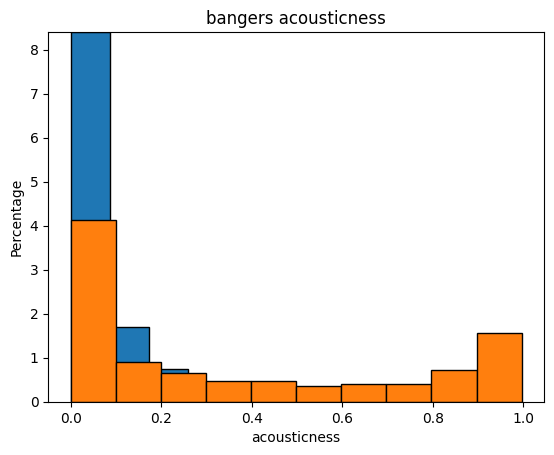

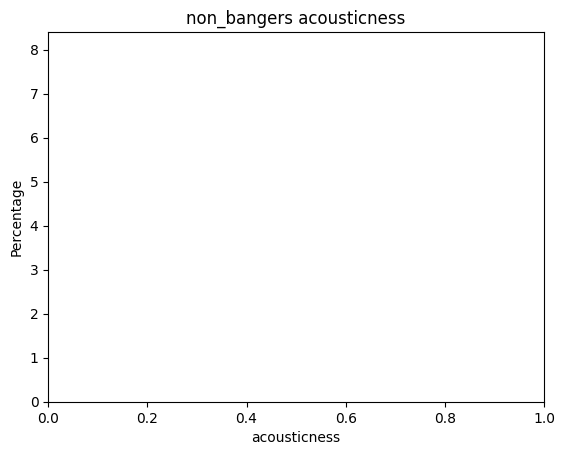

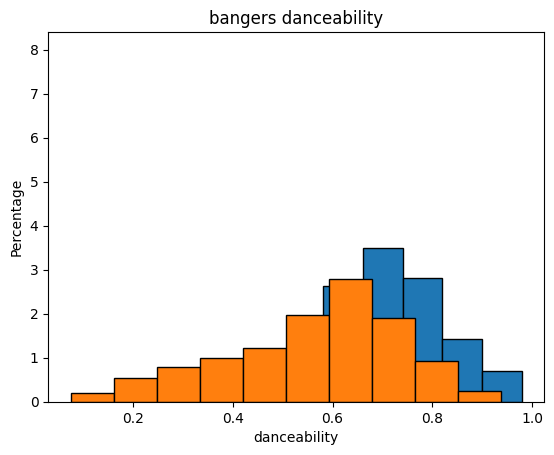

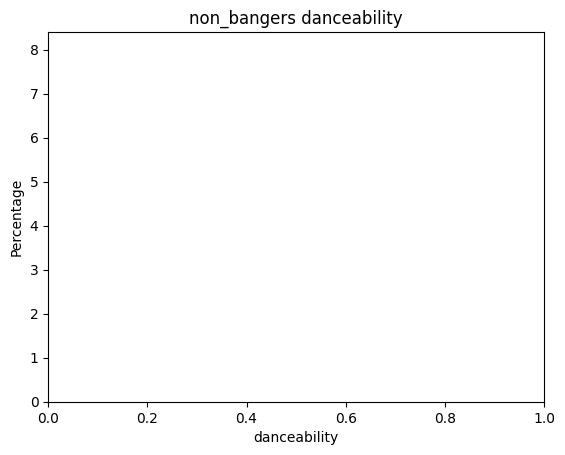

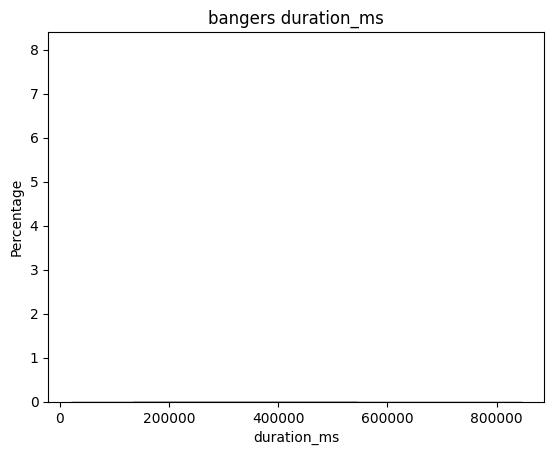

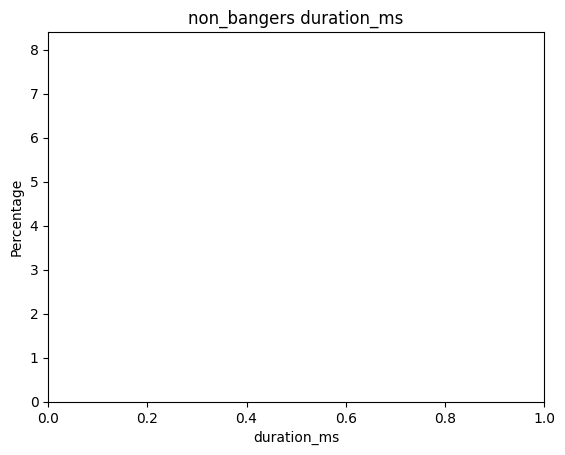

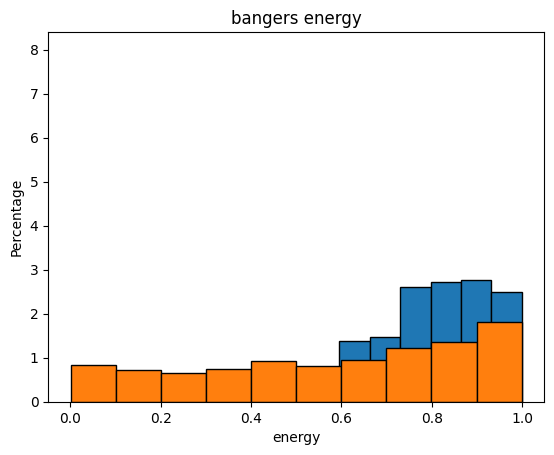

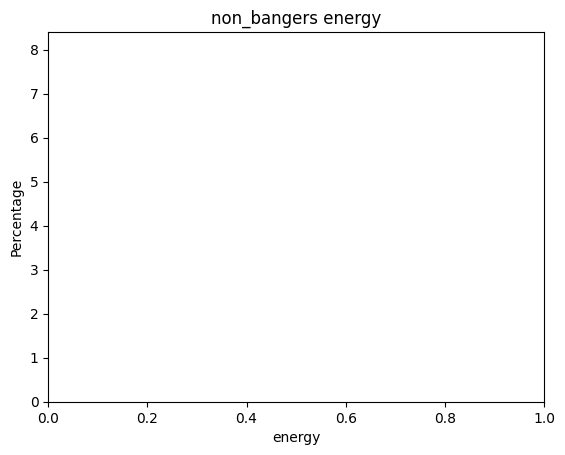

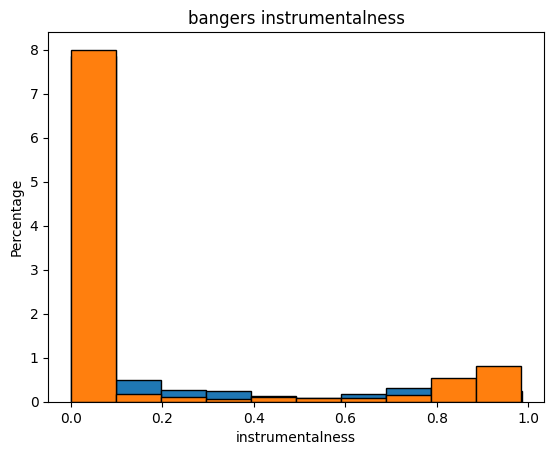

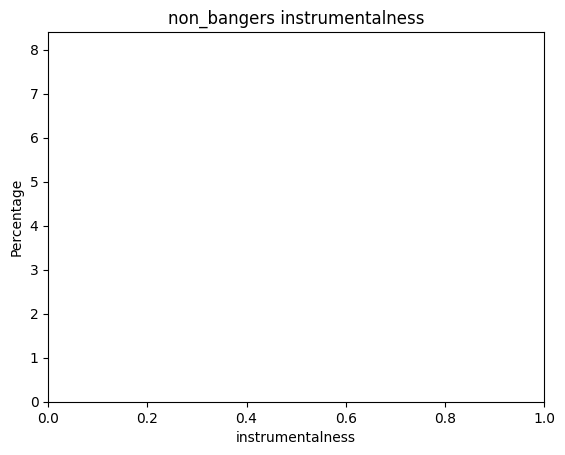

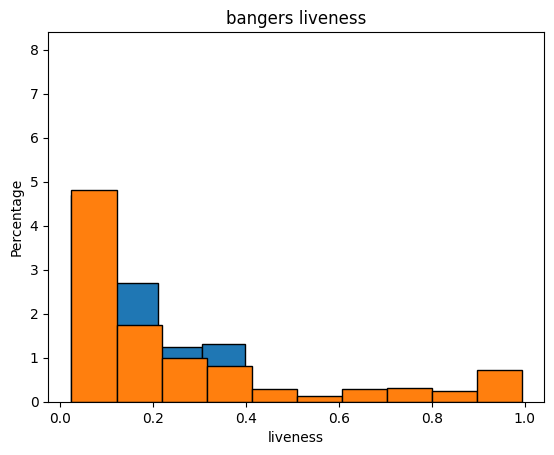

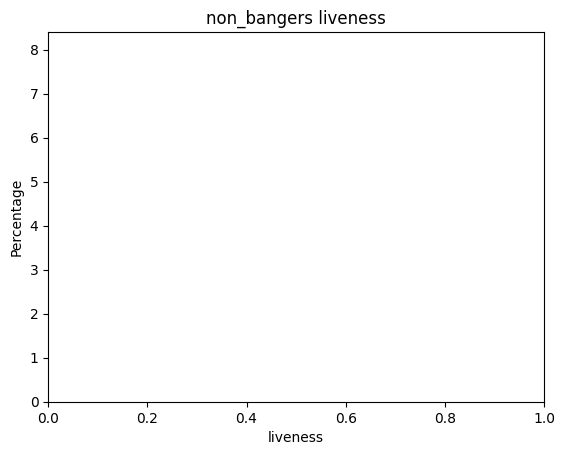

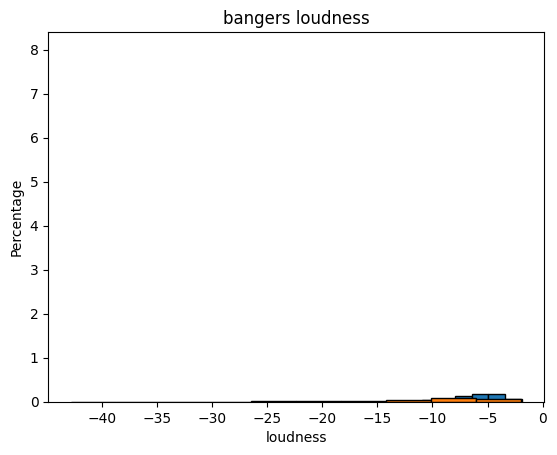

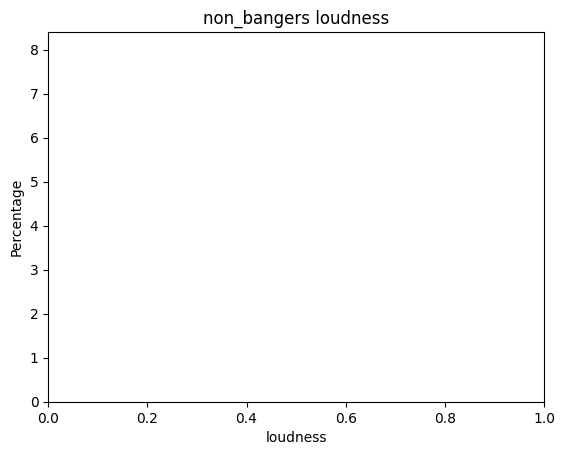

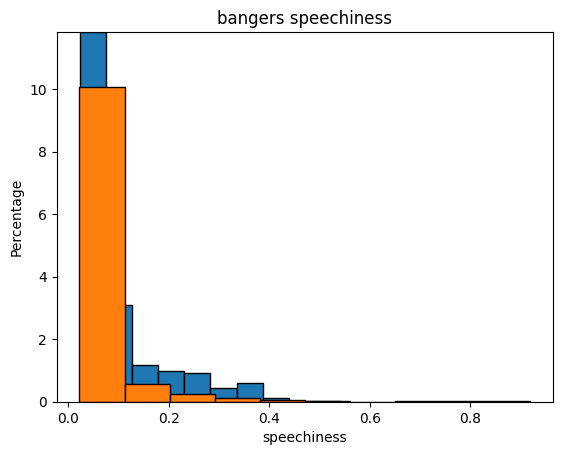

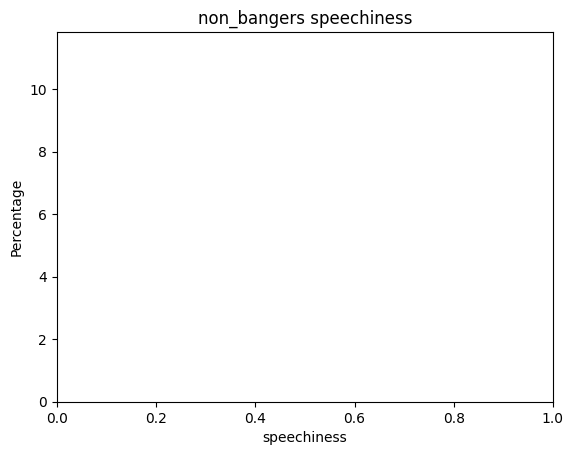

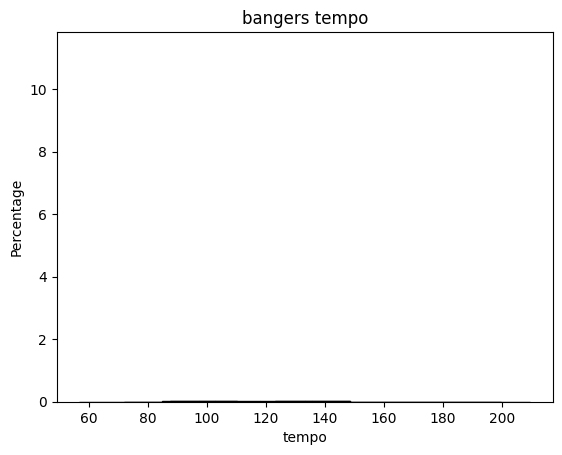

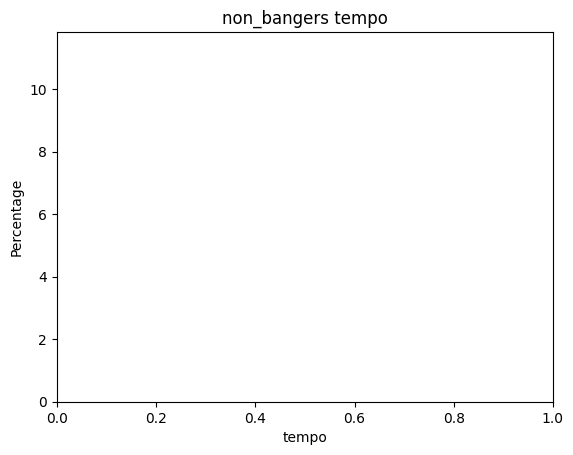

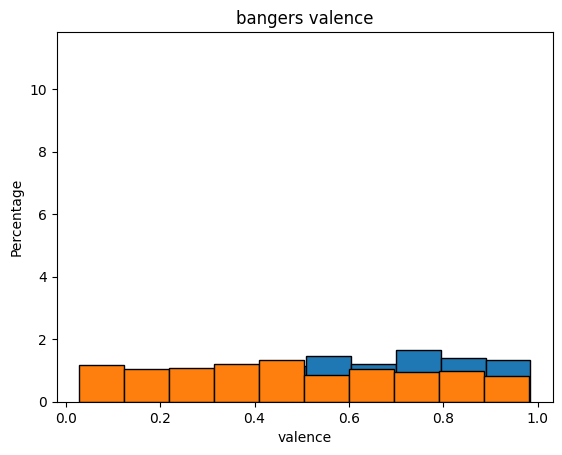

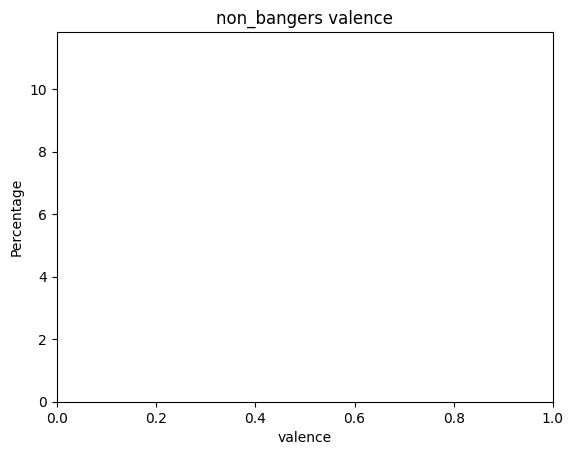

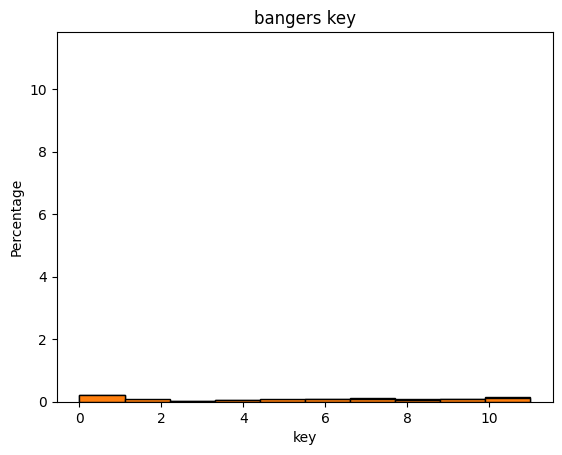

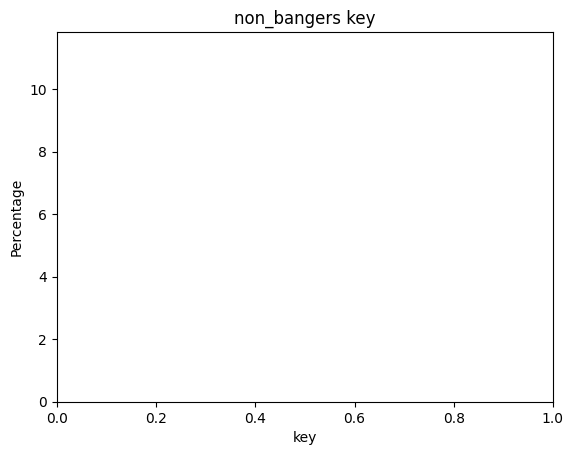

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bangers_df = pd.read_csv("./banger_features.csv")
non_bangers_df = pd.read_csv("./nonbanger_features.csv")

features_list = bangers_df.iloc[:, 3:14].columns

max_percentage = 0  # Maximum frequency across all plots

for feature in features_list:
    # Calculate the histogram for bangers
    banger_hist, banger_bins, _ = plt.hist(bangers_df[feature], bins=10, edgecolor='black', density=True,
                                           weights=np.ones(len(bangers_df[feature])) / len(bangers_df[feature]))

    # Calculate the histogram for non-bangers
    non_banger_hist, non_banger_bins, _ = plt.hist(non_bangers_df[feature], bins=10, edgecolor='black', density=True,
                                                   weights=np.ones(len(non_bangers_df[feature])) / len(non_bangers_df[feature]))

    # Update max_frequency if needed
    max_percentage = max(max_percentage, max(banger_hist.max(), non_banger_hist.max()))

    # Plot the histogram for bangers
    ax = plt.gca()
    ax.set_ylim(0, max_percentage)  # Set y-axis limits
    ax.set_title("bangers " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')  # Updated y-axis label
    plt.show()

    # Plot the histogram for non-bangers
    bx = plt.gca()
    bx.set_ylim(0, max_percentage)  # Set y-axis limits
    bx.set_title("non_bangers " + feature)
    bx.set_xlabel(feature)
    bx.set_ylabel('Percentage')  # Updated y-axis label
    plt.show()
